In [3]:
!python3 -m pip uninstall pyergast pandas numpy seaborn matplotlib -y
!python3 -m pip install --force-reinstall "numpy==1.24.3"
!python3 -m pip install --force-reinstall "pandas==2.0.3"
!python3 -m pip install --force-reinstall "matplotlib==3.7.1"
!python3 -m pip install --force-reinstall "seaborn==0.12.2"


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.24.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp39-cp39-macosx_11_0_arm64.whl (13.9 MB)
Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.0.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (18 kB)
Using cached pandas-2.0.3-cp39-cp39-macosx_11_0_arm64.whl (10.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 24.6 MB/s  0:00:00 eta 0:00:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: numpy━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/6 [tzdata]
    Found existing installation: numpy 1.24.3━━━━━━━━━━━━━━━━━ 1/6 [tzdata]
    Uninstall

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
races = pd.read_csv('archive/races.csv')
results = pd.read_csv('archive/results.csv')
drivers = pd.read_csv('archive/drivers.csv')
constructors = pd.read_csv('archive/constructors.csv')

races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [3]:
merged = pd.merge(results, races, on='raceId', how='left')
winners = merged[merged['positionOrder'] == 1]
winners.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
22,23,19,8,6,1,2,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
44,45,20,13,6,2,2,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
66,67,21,8,6,1,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
88,89,22,13,6,2,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
driver_wins = winners.groupby('driverId').size().reset_index(name='wins')
driver_wins.head()

driver_wins.sort_values(by='wins', ascending=False, inplace=True)
driver_wins = pd.merge(driver_wins, drivers[['driverId', 'driverRef', 'surname']], on='driverId', how='left') 
driver_wins.head()

,driverId,wins,driverRef
0,1,103,hamilton
1,30,91,michael_schumacher
2,20,53,vettel
3,117,51,prost
4,830,45,max_verstappen


Plotting Top 10 Drivers by Wins

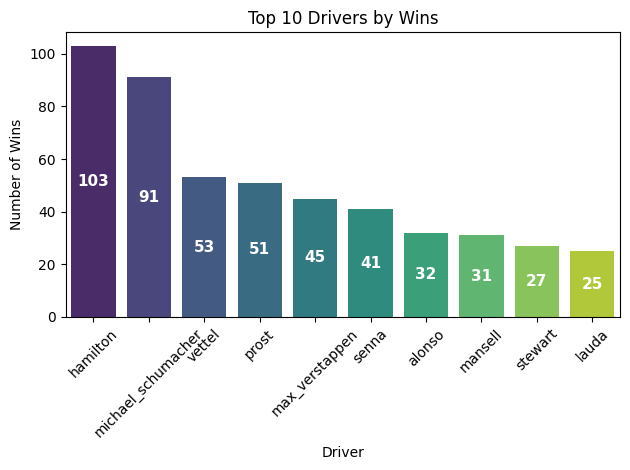

In [7]:
# Create the barplot
ax = sns.barplot(x='driverRef', y='wins', data=driver_wins.head(10), palette='viridis')

# Add value labels inside the bars
for i, v in enumerate(driver_wins.head(10)['wins']):
    ax.text(i, v/2, str(v), ha='center', va='center', 
            fontweight='bold', color='white', fontsize=11)

plt.title('Top 10 Drivers by Wins')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [9]:
const_wins = winners.groupby('constructorId').size().reset_index(name='wins')
const_wins.head()

const_wins.sort_values(by='wins', ascending=False, inplace=True)
const_wins = pd.merge(const_wins, constructors[['constructorId', 'constructorRef', 'name']], on='constructorId', how='left') 
const_wins.head()

,constructorId,wins,constructorRef,name
0,6,243,ferrari,Ferrari
1,1,179,mclaren,McLaren
2,131,125,mercedes,Mercedes
3,3,114,williams,Williams
4,9,104,red_bull,Red Bull


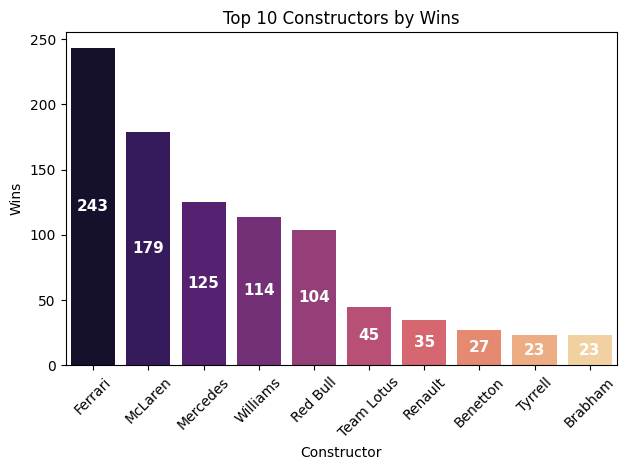

In [10]:
bx = sns.barplot(x='name', y='wins', data=const_wins.head(10), palette='magma')
for i, v in enumerate(const_wins.head(10)['wins']):
    bx.text(i, v/2, str(v), ha='center', va='center', 
            fontweight='bold', color='white', fontsize=11)

plt.title('Top 10 Constructors by Wins')
plt.xlabel('Constructor')
plt.ylabel('Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
driver_season_wins = winners.groupby(['driverId', 'year']).size().reset_index(name='wins')

driver_season_wins.sort_values(by=['driverId', 'year'], ascending=True, inplace=True)
driver_season_wins = pd.merge(driver_season_wins, drivers[['driverId', 'driverRef', 'surname']], on='driverId', how='left') 
driver_season_wins.head()

,driverId,year,wins,driverRef,surname
0,1,2007,4,hamilton,Hamilton
1,1,2008,5,hamilton,Hamilton
2,1,2009,2,hamilton,Hamilton
3,1,2010,3,hamilton,Hamilton
4,1,2011,3,hamilton,Hamilton


In [15]:
# Check which combinations are duplicated
duplicates = driver_season_wins.groupby(['year']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]
print("Duplicate combinations:")
print(duplicates)


Duplicate combinations:
    year  count
0   1950      3
1   1951      6
2   1952      3
3   1953      5
4   1954      4
..   ...    ...
69  2019      5
70  2020      5
71  2021      6
72  2022      5
73  2023      2

[74 rows x 2 columns]


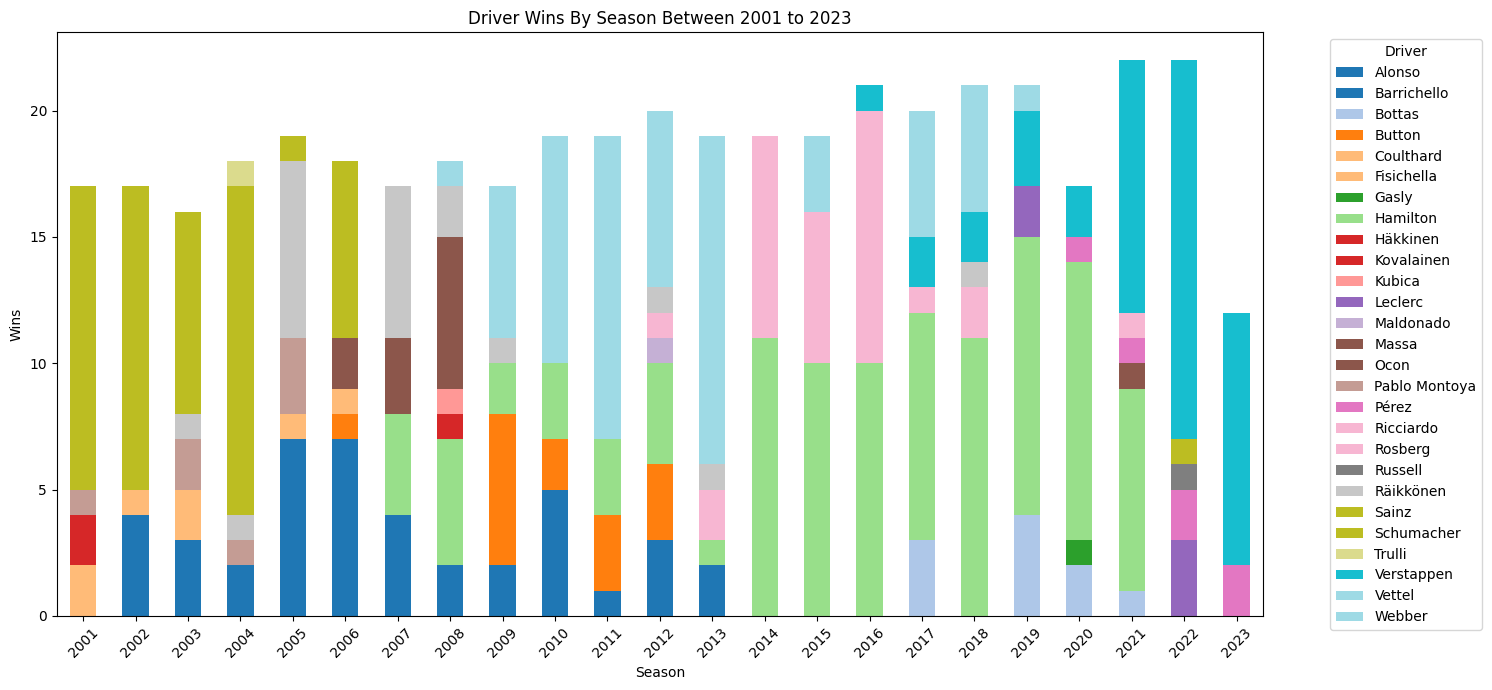

In [18]:
pivot = driver_season_wins[driver_season_wins['year']>2000].pivot_table(index='year', columns='surname', values='wins', aggfunc='sum',fill_value=0)
pivot.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.title('Driver Wins By Season Between 2001 to 2023')
plt.xlabel('Season')
plt.ylabel('Wins')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()